In [2]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

Using TensorFlow backend.


In [3]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

C:\Users\sai ram\Anaconda3\envs\python-cvcourse\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 422, 422, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [4]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in G:\data science tutorials\comptask\Yolo-digit-detector-master\weights.h5


In [17]:
os.listdir(r'G:\data science tutorials\comptask\Yolo-digit-detector-master\tests\dataset\svhn\imgs')
#os.listdir(r'G:\data science tutorials\comptask\Yolo-digit-detector-master\tests\dataset\svh\imgs')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'G:\\data science tutorials\\comptask\\Yolo-digit-detector-master\\tests\\dataset\\svh\\imgs'

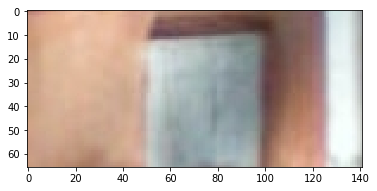

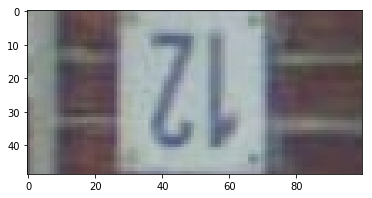

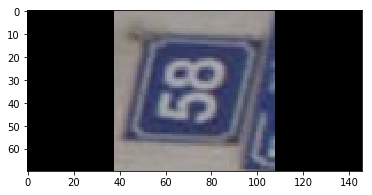

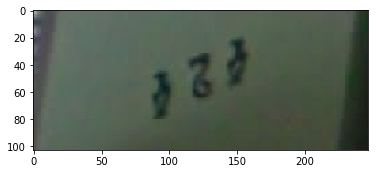

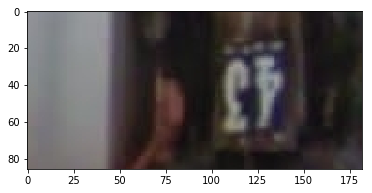

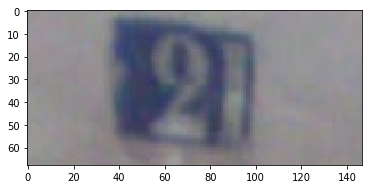

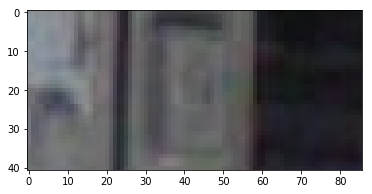

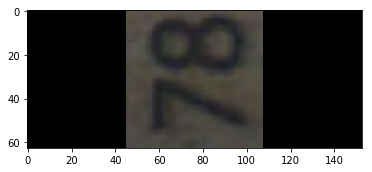

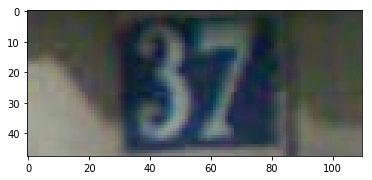

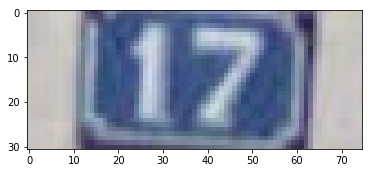

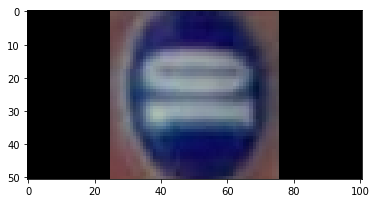

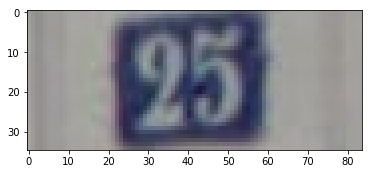

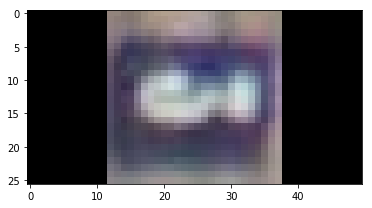

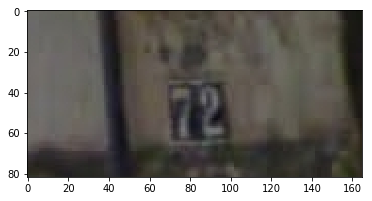

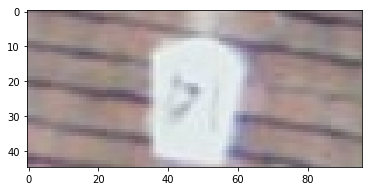

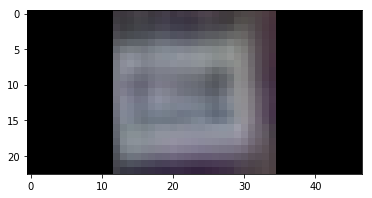

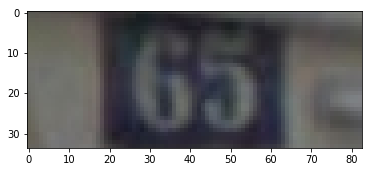

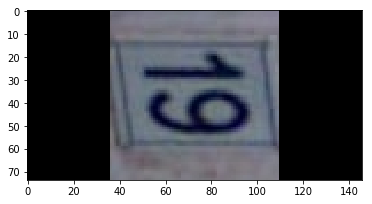

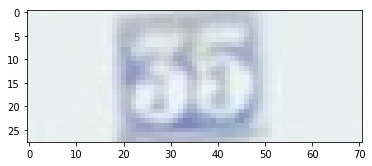

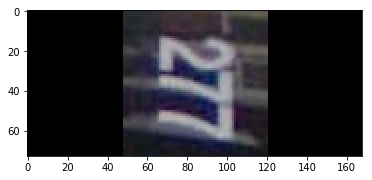

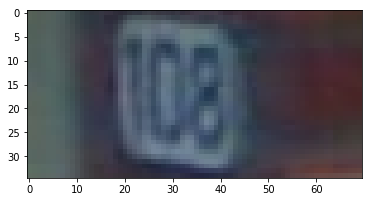

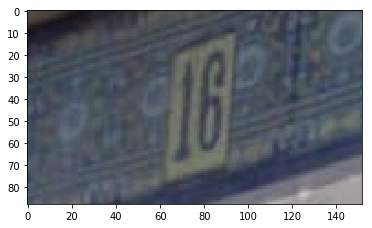

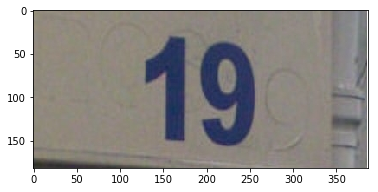

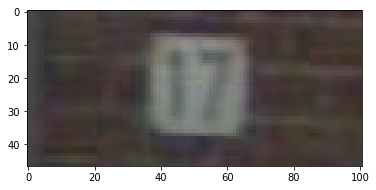

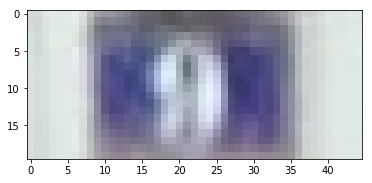

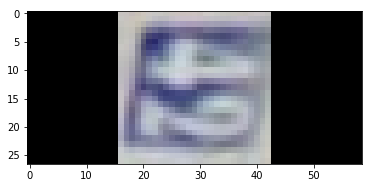

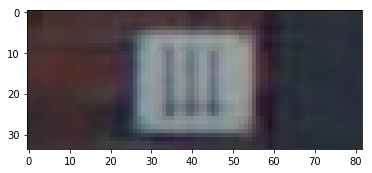

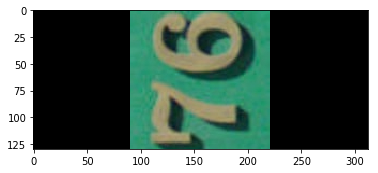

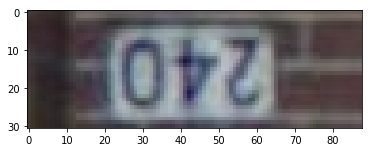

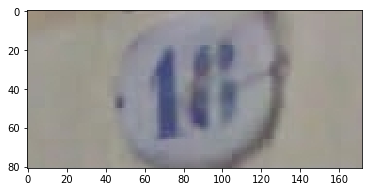

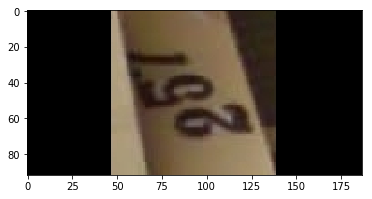

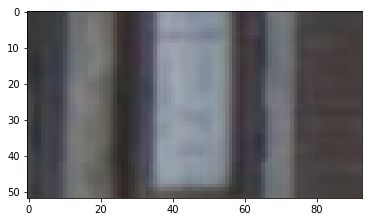

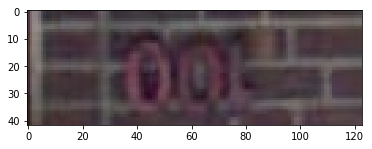

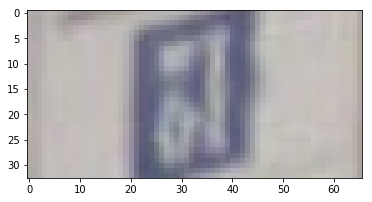

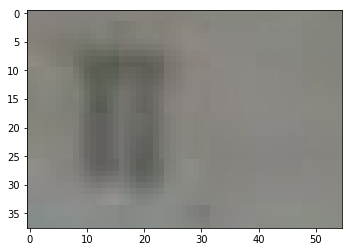

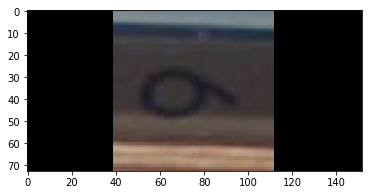

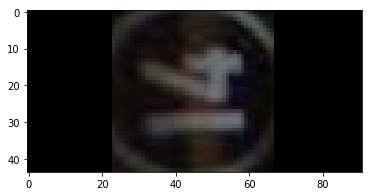

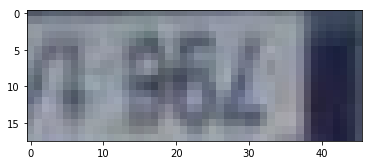

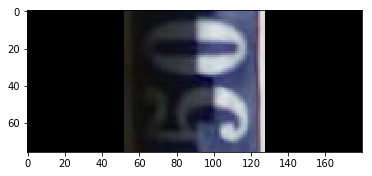

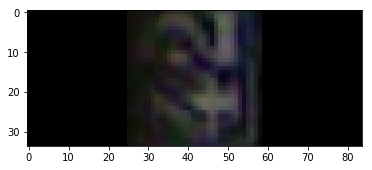

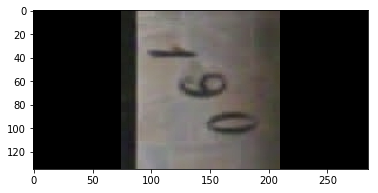

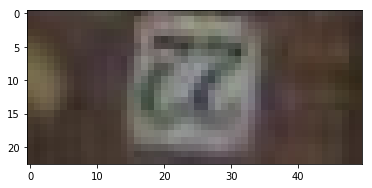

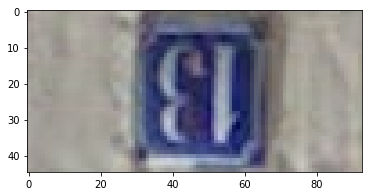

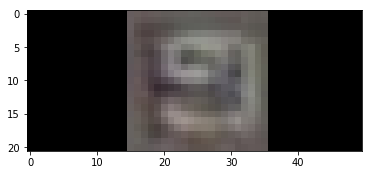

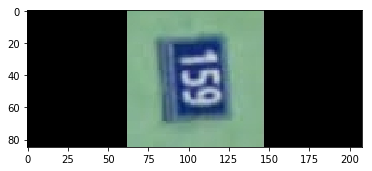

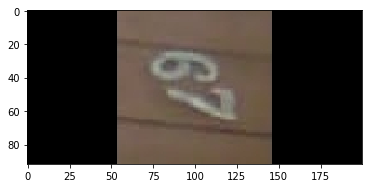

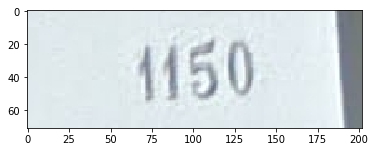

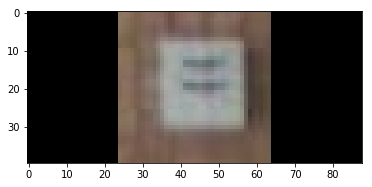

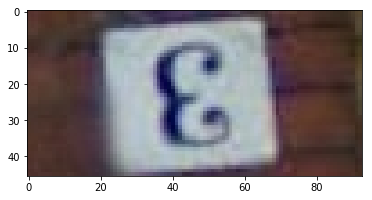

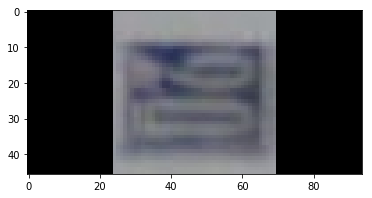

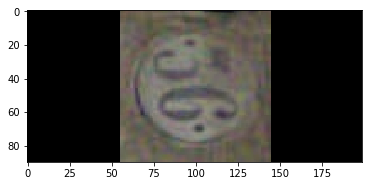

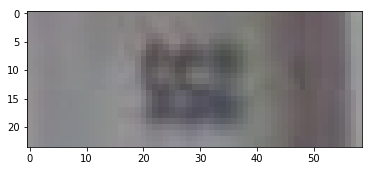

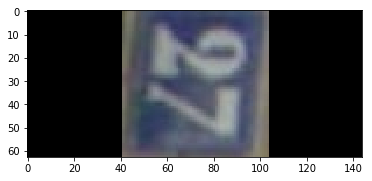

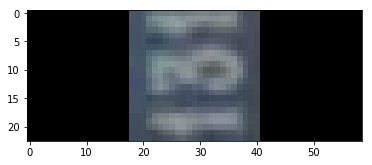

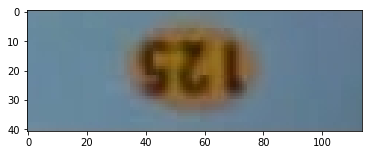

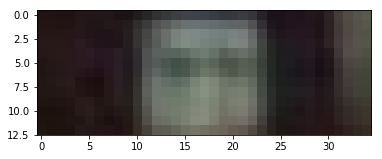

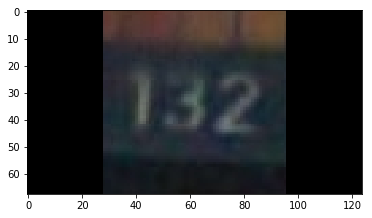

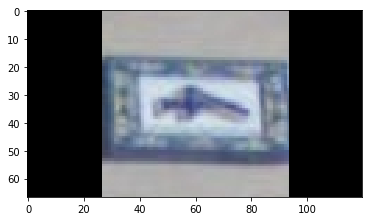

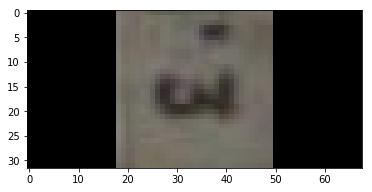

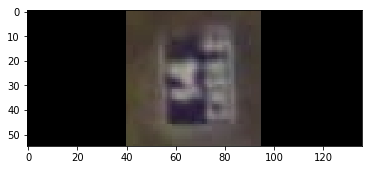

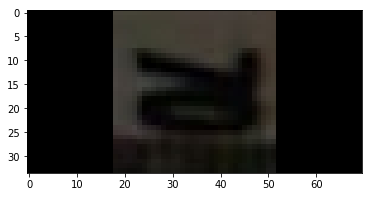

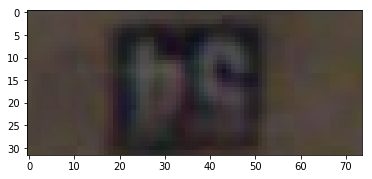

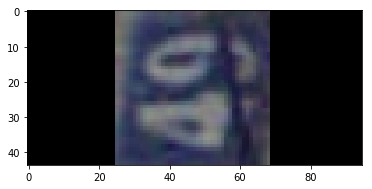

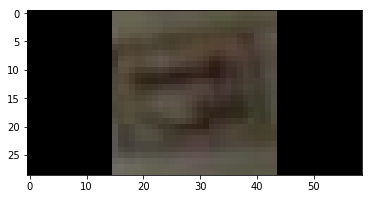

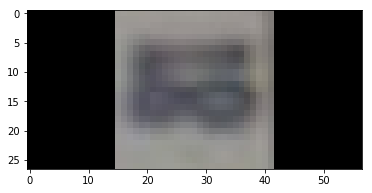

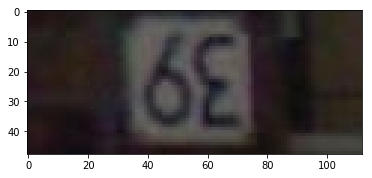

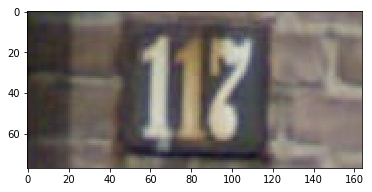

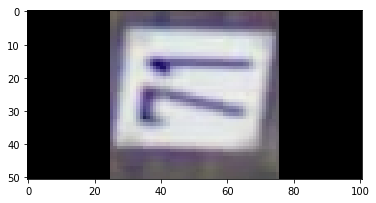

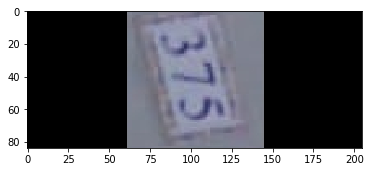

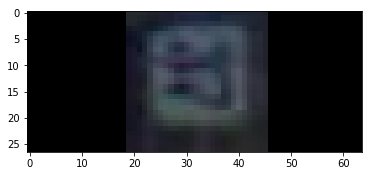

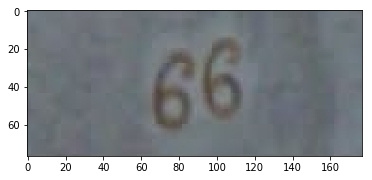

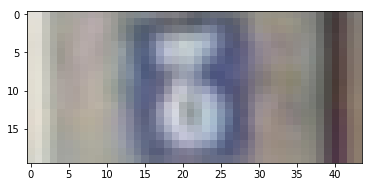

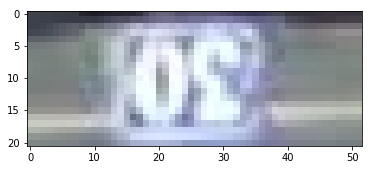

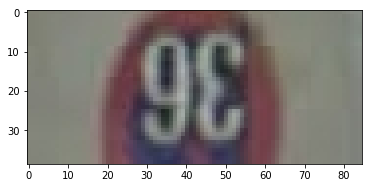

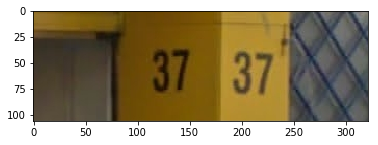

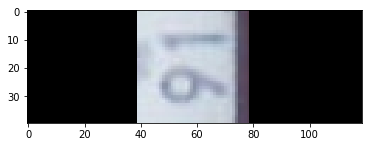

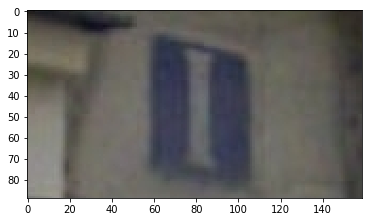

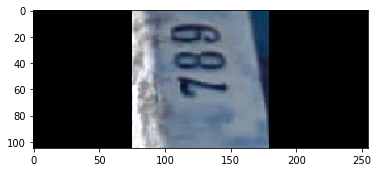

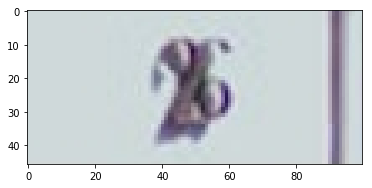

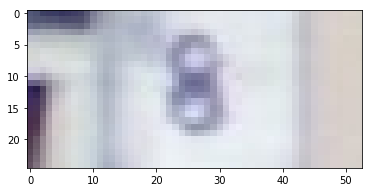

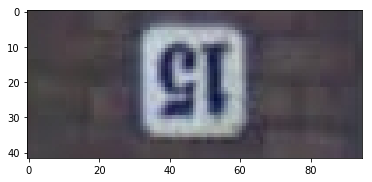

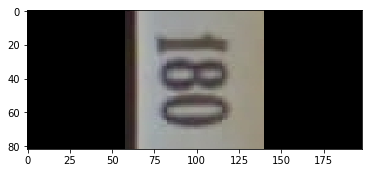

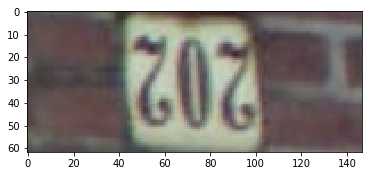

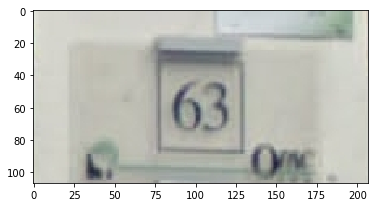

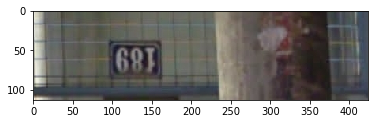

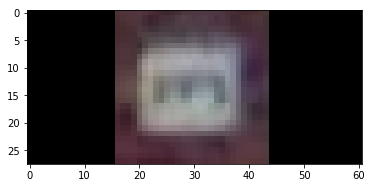

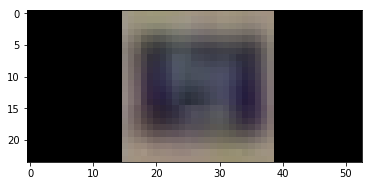

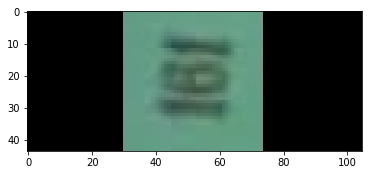

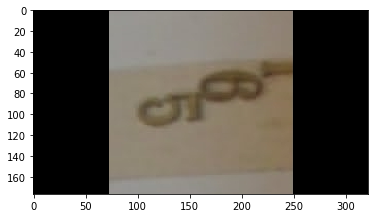

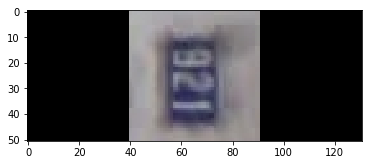

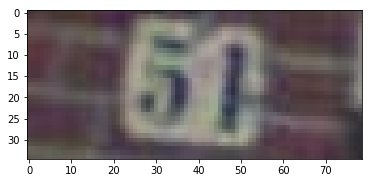

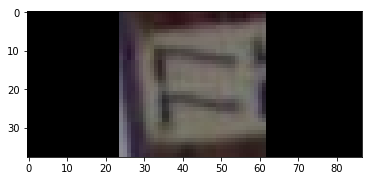

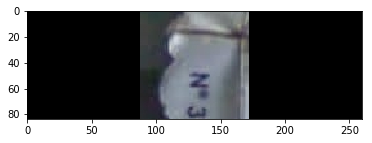

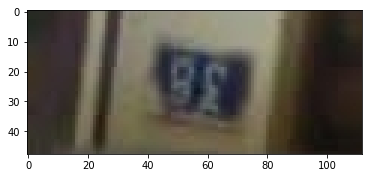

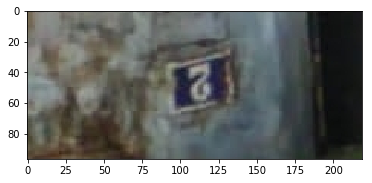

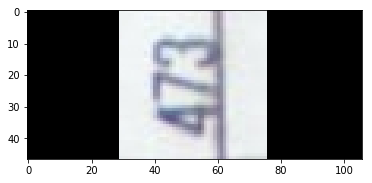

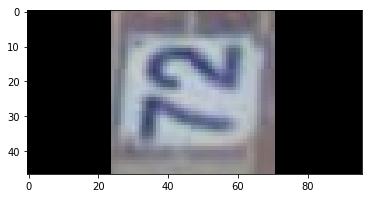

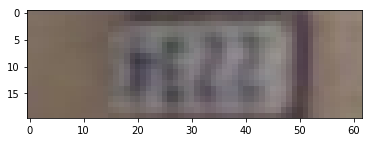

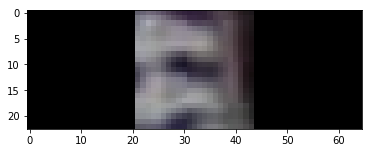

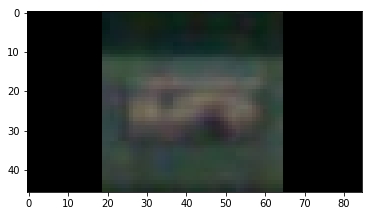

In [18]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = os.listdir(r'G:\data science tutorials\comptask\Yolo-digit-detector-master\tests\dataset\svhn\imgs')
imgs = []
for fname in img_files:
    img = cv2.imread(r'G:\data science tutorials\comptask\Yolo-digit-detector-master\tests\dataset\svhn\imgs' +"\\"+fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

226-boxes are detected.


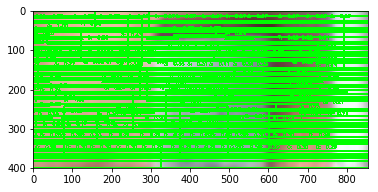

246-boxes are detected.


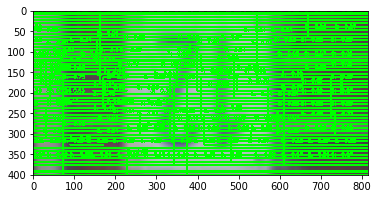

226-boxes are detected.


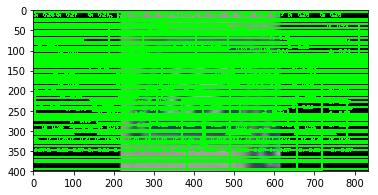

217-boxes are detected.


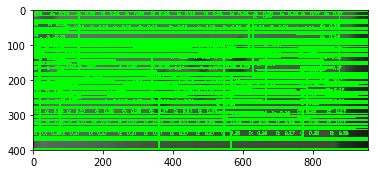

224-boxes are detected.


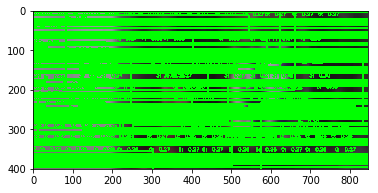

221-boxes are detected.


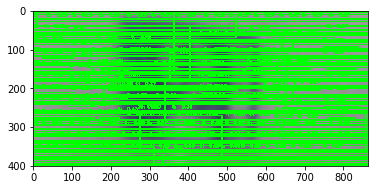

219-boxes are detected.


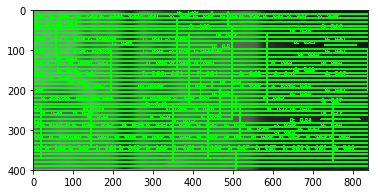

225-boxes are detected.


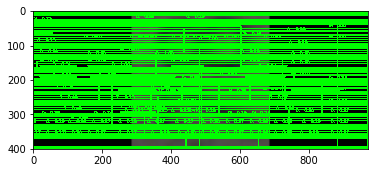

223-boxes are detected.


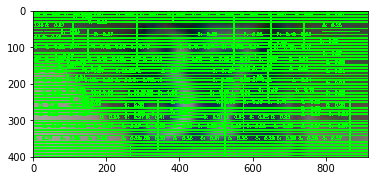

228-boxes are detected.


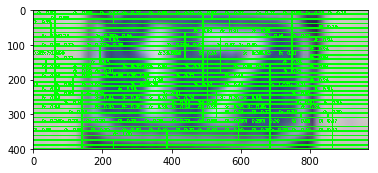

226-boxes are detected.


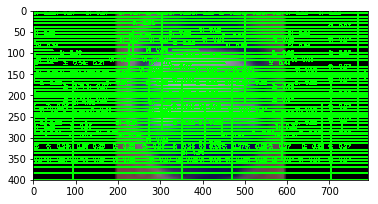

221-boxes are detected.


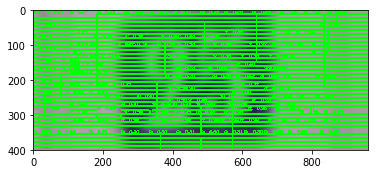

238-boxes are detected.


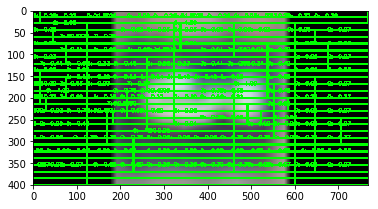

213-boxes are detected.


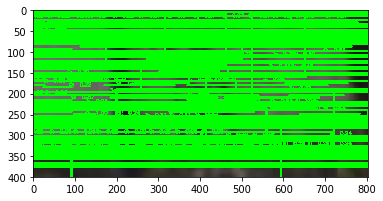

226-boxes are detected.


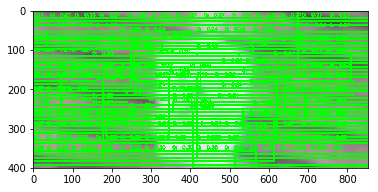

222-boxes are detected.


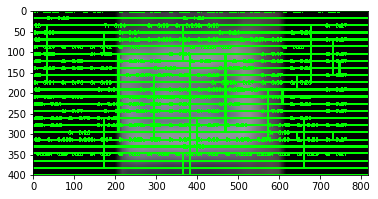

228-boxes are detected.


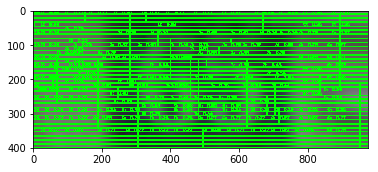

231-boxes are detected.


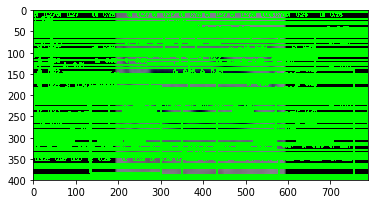

217-boxes are detected.


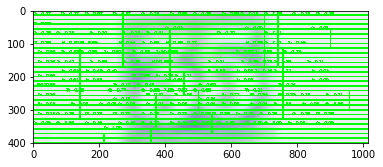

245-boxes are detected.


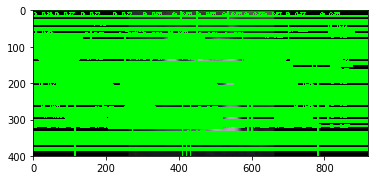

227-boxes are detected.


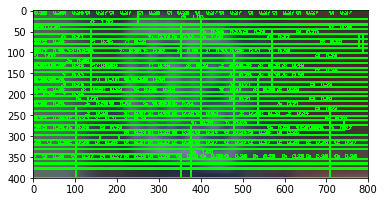

222-boxes are detected.


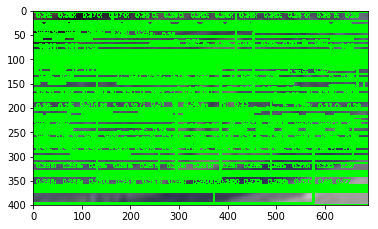

207-boxes are detected.


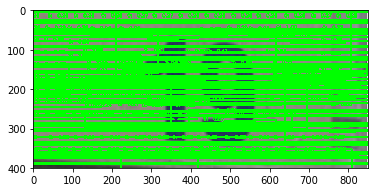

213-boxes are detected.


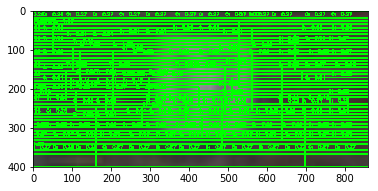

221-boxes are detected.


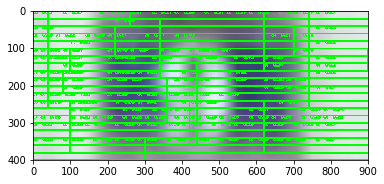

231-boxes are detected.


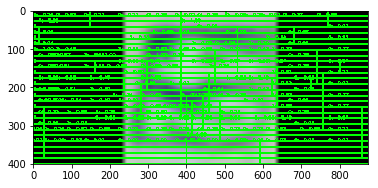

209-boxes are detected.


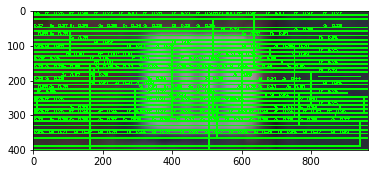

248-boxes are detected.


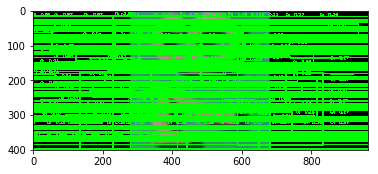

229-boxes are detected.


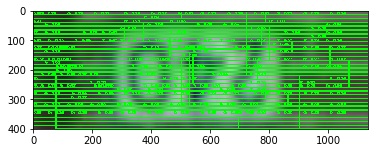

226-boxes are detected.


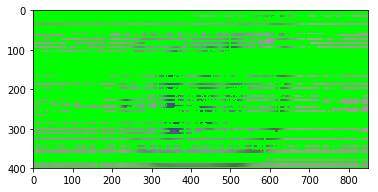

234-boxes are detected.


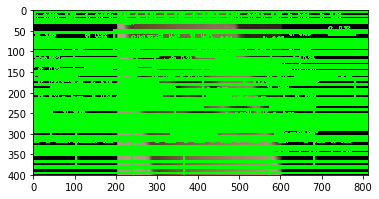

224-boxes are detected.


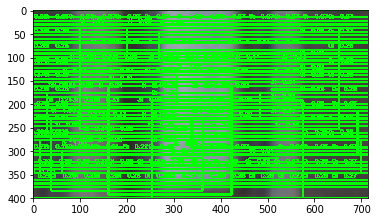

221-boxes are detected.


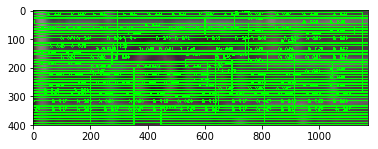

233-boxes are detected.


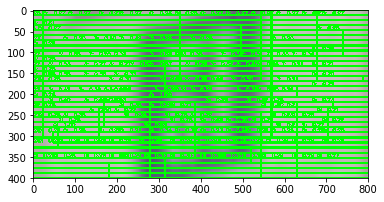

231-boxes are detected.


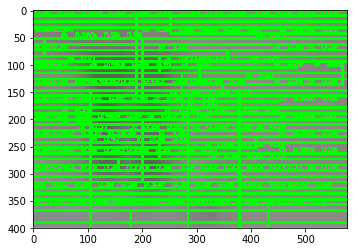

238-boxes are detected.


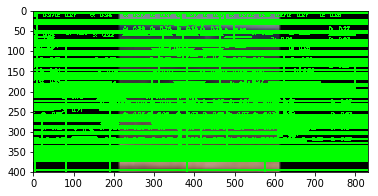

236-boxes are detected.


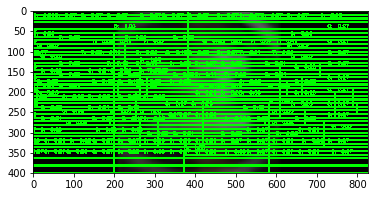

218-boxes are detected.


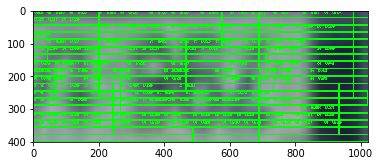

232-boxes are detected.


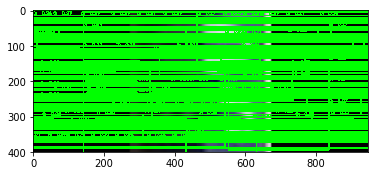

227-boxes are detected.


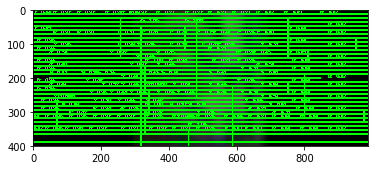

233-boxes are detected.


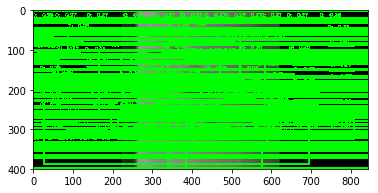

230-boxes are detected.


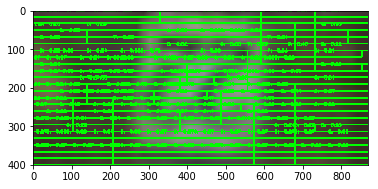

225-boxes are detected.


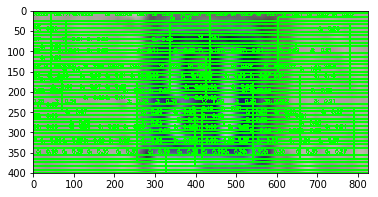

228-boxes are detected.


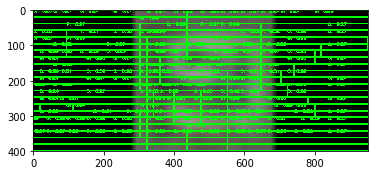

237-boxes are detected.


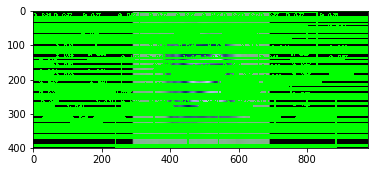

230-boxes are detected.


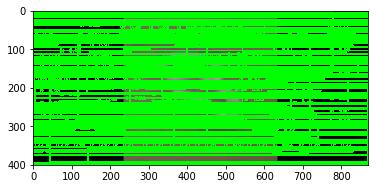

224-boxes are detected.


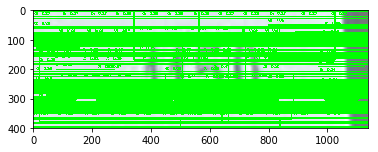

235-boxes are detected.


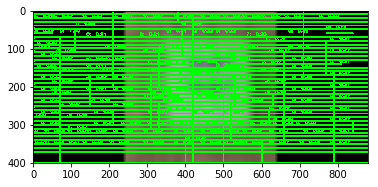

231-boxes are detected.


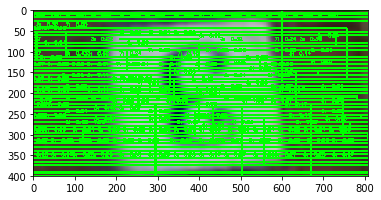

231-boxes are detected.


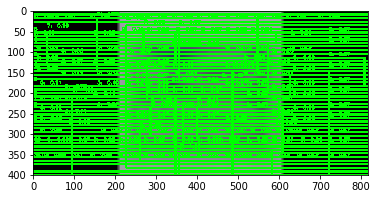

229-boxes are detected.


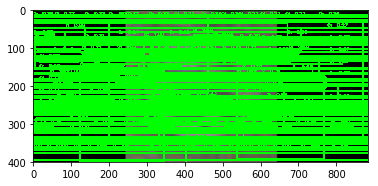

217-boxes are detected.


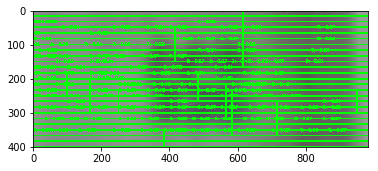

236-boxes are detected.


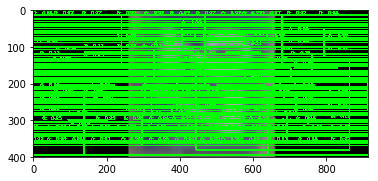

226-boxes are detected.


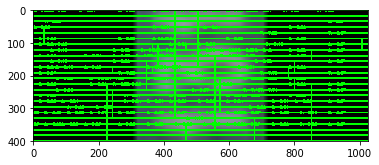

218-boxes are detected.


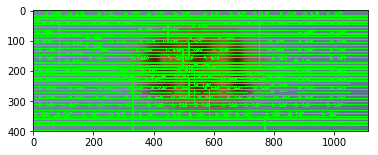

212-boxes are detected.


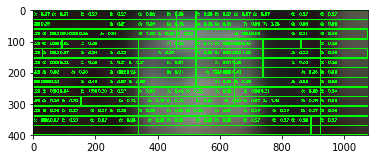

231-boxes are detected.


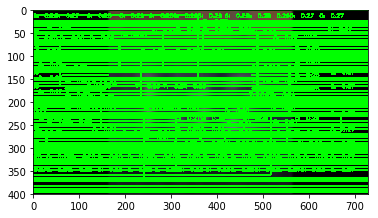

235-boxes are detected.


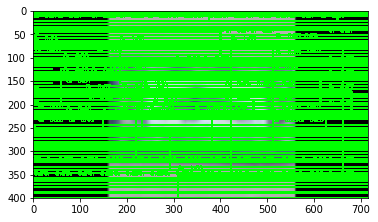

227-boxes are detected.


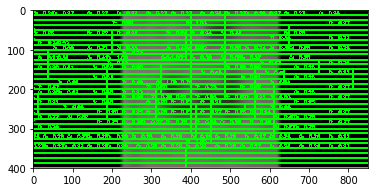

230-boxes are detected.


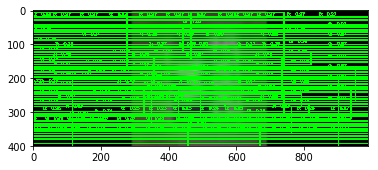

231-boxes are detected.


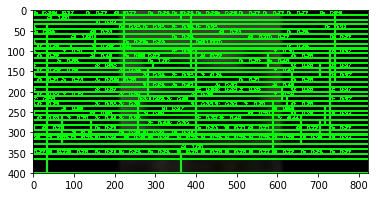

232-boxes are detected.


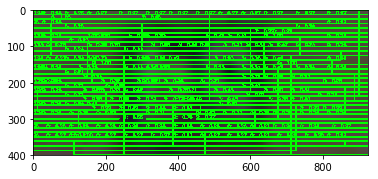

225-boxes are detected.


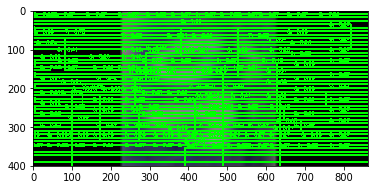

216-boxes are detected.


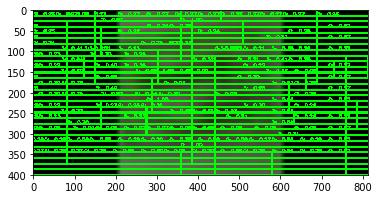

231-boxes are detected.


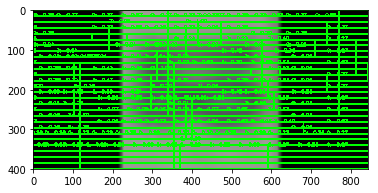

223-boxes are detected.


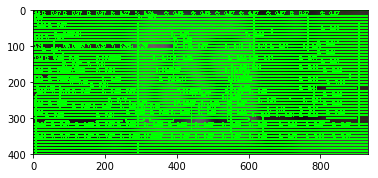

229-boxes are detected.


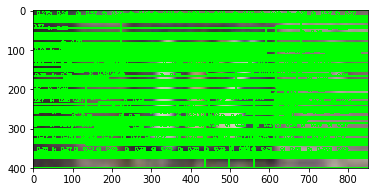

232-boxes are detected.


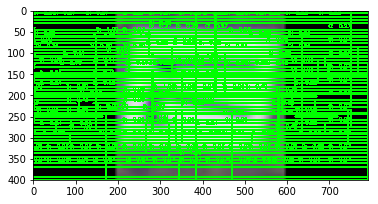

221-boxes are detected.


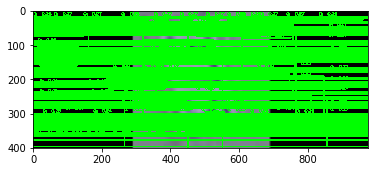

223-boxes are detected.


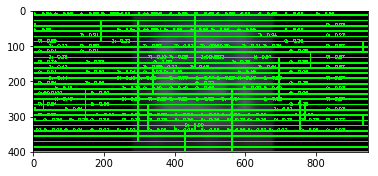

224-boxes are detected.


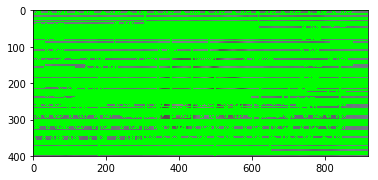

219-boxes are detected.


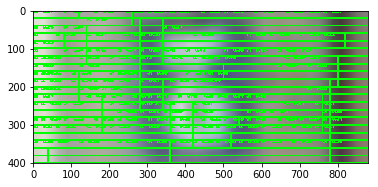

227-boxes are detected.


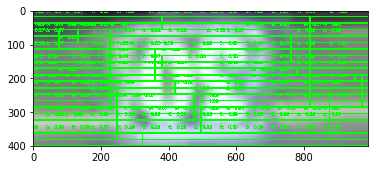

227-boxes are detected.


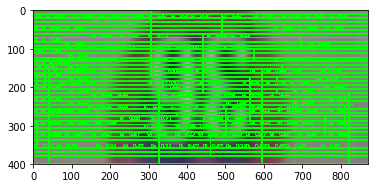

234-boxes are detected.


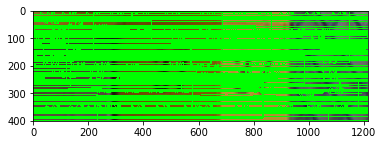

247-boxes are detected.


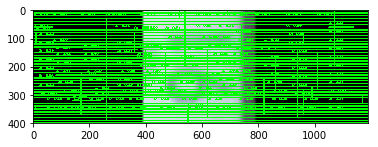

220-boxes are detected.


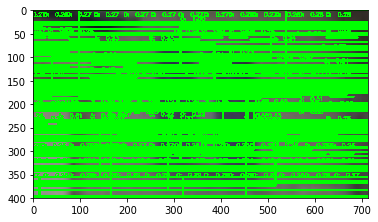

232-boxes are detected.


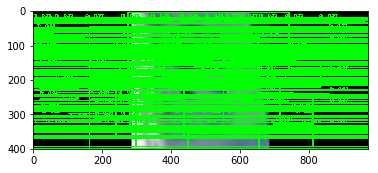

225-boxes are detected.


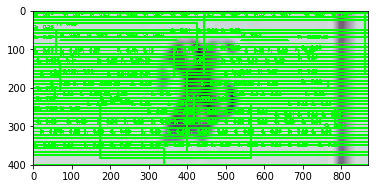

221-boxes are detected.


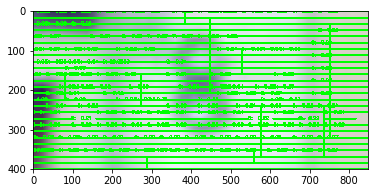

217-boxes are detected.


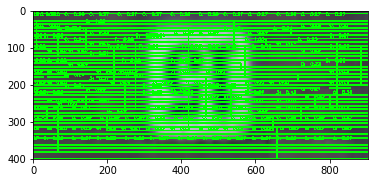

232-boxes are detected.


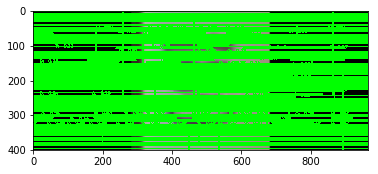

225-boxes are detected.


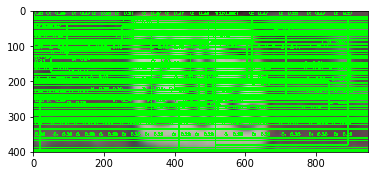

239-boxes are detected.


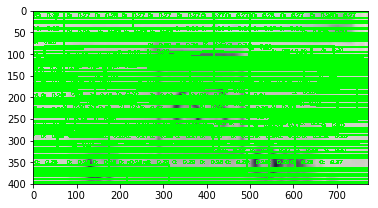

226-boxes are detected.


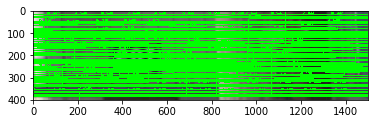

226-boxes are detected.


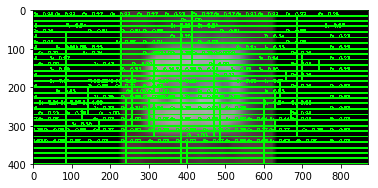

232-boxes are detected.


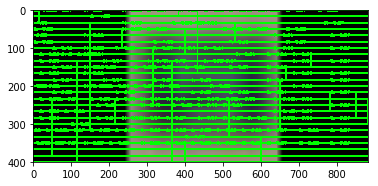

231-boxes are detected.


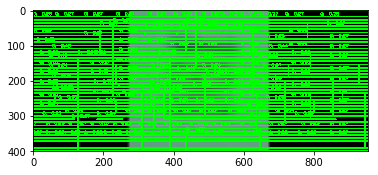

236-boxes are detected.


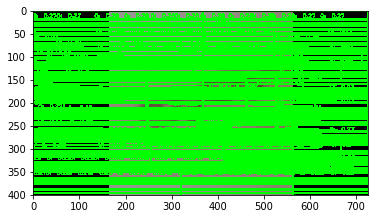

226-boxes are detected.


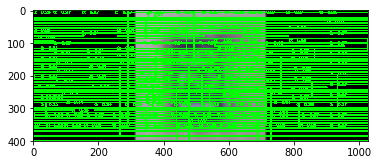

244-boxes are detected.


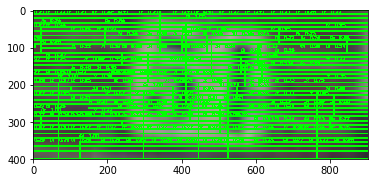

226-boxes are detected.


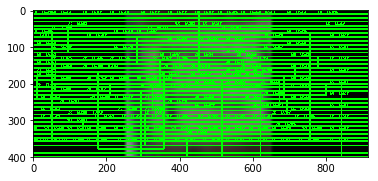

241-boxes are detected.


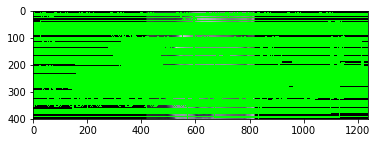

219-boxes are detected.


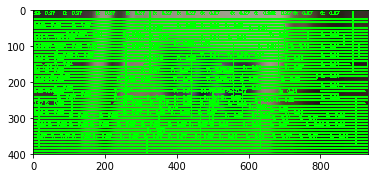

227-boxes are detected.


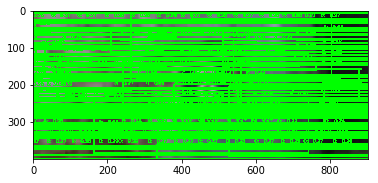

239-boxes are detected.


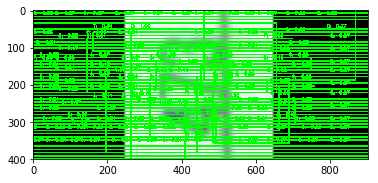

230-boxes are detected.


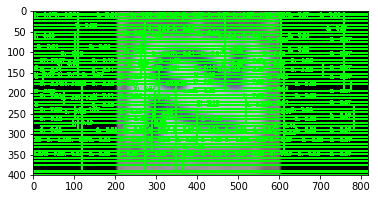

217-boxes are detected.


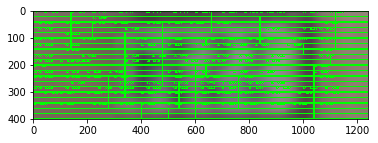

233-boxes are detected.


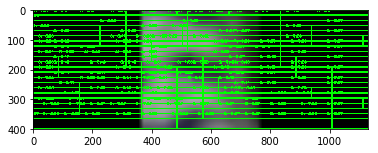

230-boxes are detected.


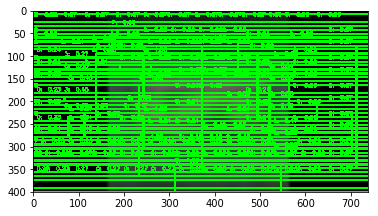

In [23]:
# 4. Predict digit region

THRESHOLD = 0.2
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    os.chdir(r'G:\data science tutorials\comptask\Yolo-digit-detector-master\tests\dataset\svhn\imgs')
 #   cv2.imwrite(img+'.jpg',img)
    plt.imshow(image)
    plt.show()
